<h4>Import libs and set params</h4>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing     import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model      import LogisticRegression
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.datasets          import make_classification, load_iris

from scipy.stats               import f_oneway

from collections               import Counter
from imblearn.over_sampling    import SMOTE

In [3]:
RANDOM_STATE = 24

np.random.seed(RANDOM_STATE)

NOISE        = 0.1
N_SAMPLES    =1000
ALPHA        =0.001     #learning rate
TEST_SIZE    =0.2

In [4]:
params = {
    'legend.fontsize'    : 'small',
    'figure.figsize'     : (15,5),
    'axes.labelsize'     : 'medium',
    'axes.titlesize'     : 'large',
    'xtick.labelsize'    : 'medium',
    'ytick.labelsize'    : 'medium',
    'savefig.dpi'        : 75,
    'image.interpolation': 'none',
    'savefig.bbox'       : 'tight',
    'lines.linewidth'    : 1,
    'legend.numpoints'   : 1,
}

CMAP = plt.cm.rainbow

plt.rcParams.update(params)

plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid')

<Figure size 1500x500 with 0 Axes>

<h4>Missing Data and Imputer</h4>

In [6]:
titanic_df=pd.read_csv('titanic.csv')

In [7]:
titanic_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [9]:
titanic_df.shape

(1309, 11)

In [10]:
for col in titanic_df:
    print(f'{col}: {titanic_df[col].unique()}\n')

pclass: [1 2 3]

name: ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']

sex: ['female' 'male']

age: [29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.         nan 50.     32.
 36.     37.     42.     19.     35.     28.     45.     40.     58.
 22.     41.     44.     59.     60.     33.     17.     11.     14.
 49.     76.     46.     27.     64.     55.     70.     38.     51.
 31.      4.     54.     23.     43.     52.     16.     32.5    21.
 15.     65.     28.5    45.5    56.     13.     61.     34.      6.
 57.     62.     67.      1.     12.     20.      0.8333  8.      0.6667
  7.      3.     36.5    18.5     5.     66.      9.      0.75   70.5
 22.5     0.3333  0.1667 40.5    10.     23.5    34.5    20.5    30.5
 55.5    38.5    14.5    24.5    60.5    74.      0.4167 11.5    26.5   ]

s

In [11]:
titanic_df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

<h4>Approach-1 remove missing item</h4>
<h5>Caution :- you may lose important information</h5>

In [13]:
#list of column to be removed
drop_cols = ['fare', 'cabin', 'ticket', 'name']
#remoing listed column
titanic_df = titanic_df.drop(drop_cols, axis = 1)
titanic_df.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,female,29.0000,0,0,S,1
1,1,male,0.9167,1,2,S,1
2,1,female,2.0000,1,2,S,0
3,1,male,30.0000,1,2,S,0
4,1,female,25.0000,1,2,S,0


In [14]:
titanic_df[titanic_df['embarked'].isnull()]

,pclass,sex,age,sibsp,parch,embarked,survived
168,1,female,38.0,0,0,NaN,1
284,1,female,62.0,0,0,NaN,1


In [15]:
titanic_df['embarked'].mode()[0]

'S'

In [16]:
titanic_df['embarked']=titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0])
titanic_df.iloc[[168,284]]

,pclass,sex,age,sibsp,parch,embarked,survived
168,1,female,38.0,0,0,S,1
284,1,female,62.0,0,0,S,1


<h4>Age</h4>

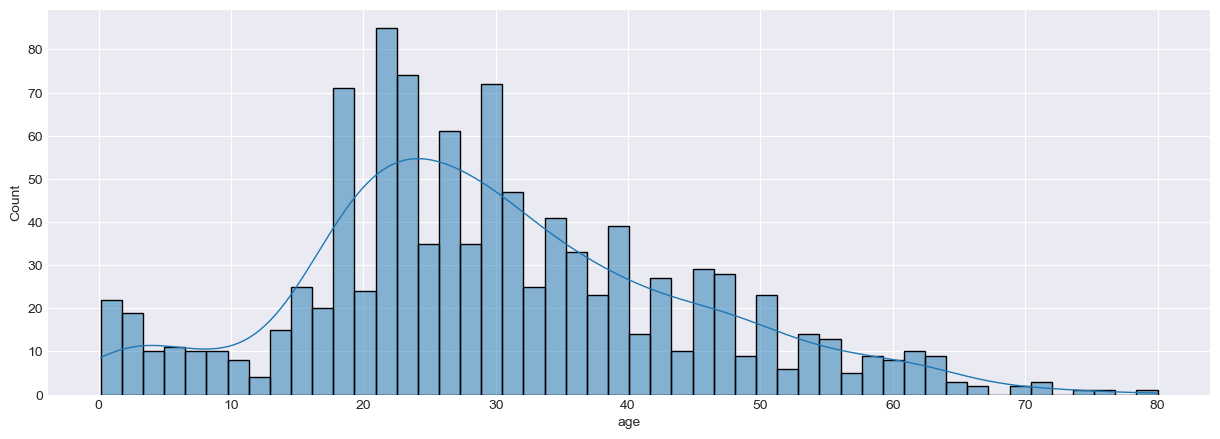

In [18]:
ax = sns.histplot(data=titanic_df, x = 'age', bins = 50, kde = True)

In [19]:
titanic_df[titanic_df['age'].isnull()]

,pclass,sex,age,sibsp,parch,embarked,survived
15,1,male,NaN,0,0,S,0
37,1,male,NaN,0,0,S,1
40,1,male,NaN,0,0,C,0
46,1,male,NaN,0,0,S,0
59,1,female,NaN,0,0,C,1
...,...,...,...,...,...,...,...
1293,3,male,NaN,0,0,S,0
1297,3,male,NaN,0,0,S,0
1302,3,male,NaN,0,0,C,0
1303,3,male,NaN,0,0,C,0


In [20]:
gender_mean = titanic_df.pivot_table('age', columns='sex', aggfunc='mean')
gender_mean

sex,female,male
age,28.687071,30.585233


In [21]:
titanic_df['age'] = titanic_df[['age', 'sex']].apply(
    lambda x : gender_mean[x ['sex']]['age'] if pd.isnull(x ['age']) else x['age'],
    axis=1
)

In [22]:
titanic_df.iloc[[15,59]]

,pclass,sex,age,sibsp,parch,embarked,survived
15,1,male,30.585233,0,0,S,0
59,1,female,28.687071,0,0,C,1


ax = sns.histplot(data=titanic_df, x = 'age', bins = 80, kde = True)

<h4>One Hot Encoding</h4>

In [25]:
titanic_df = pd.get_dummies(titanic_df, columns=['embarked'], dtype=np.int8)
titanic_df.head()

,pclass,sex,age,sibsp,parch,survived,embarked_C,embarked_Q,embarked_S
0,1,female,29.0000,0,0,1,0,0,1
1,1,male,0.9167,1,2,1,0,0,1
2,1,female,2.0000,1,2,0,0,0,1
3,1,male,30.0000,1,2,0,0,0,1
4,1,female,25.0000,1,2,0,0,0,1


In [26]:
le = LabelEncoder()

le.fit(titanic_df['sex'])

display(le.classes_)

titanic_df['sex'] = le.transform(titanic_df['sex'])

titanic_df.head()

array(['female', 'male'], dtype=object)

,pclass,sex,age,sibsp,parch,survived,embarked_C,embarked_Q,embarked_S
0,1,0,29.0000,0,0,1,0,0,1
1,1,1,0.9167,1,2,1,0,0,1
2,1,0,2.0000,1,2,0,0,0,1
3,1,1,30.0000,1,2,0,0,0,1
4,1,0,25.0000,1,2,0,0,0,1


In [27]:
y = titanic_df.survived # label or targets
X = titanic_df.drop('survived',  axis=1) #features

X_train, X_test, y_train,y_test= train_test_split(X, y,
                                                 stratify=y,
                                                 test_size= TEST_SIZE,
                                                 random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((1047, 8), (262, 8), (1047,), (262,))

In [28]:
scaler = StandardScaler()
scaler = scaler.fit(X_train) # always fit on train
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-1.55341657, -1.34703977,  1.82408562, ..., -0.50387718,
        -0.31772059,  0.64558457],
       [ 0.83487586, -1.34703977, -1.07313302, ..., -0.50387718,
        -0.31772059,  0.64558457],
       [-1.55341657,  0.74236858, -0.36840416, ...,  1.9846106 ,
        -0.31772059, -1.54898375],
       ...,
       [ 0.83487586,  0.74236858, -0.44670737, ..., -0.50387718,
        -0.31772059,  0.64558457],
       [-1.55341657,  0.74236858,  0.02311187, ...,  1.9846106 ,
        -0.31772059, -1.54898375],
       [ 0.83487586,  0.74236858, -1.07313302, ..., -0.50387718,
        -0.31772059,  0.64558457]])

(array([ 15.,  15.,   7.,  11.,   8.,  10.,   7.,   3.,  14.,  20.,  18.,
         59.,  17.,  68.,  61.,  28.,  47.,  94.,  54., 191.,  18.,  31.,
         27.,  19.,  29.,  10.,  23.,   7.,  19.,  23.,   7.,  17.,   6.,
         12.,  12.,   5.,   4.,   7.,   8.,   6.,   3.,   2.,   0.,   1.,
          2.,   0.,   1.,   0.,   0.,   1.]),
 array([-2.31293118, -2.18790712, -2.06288305, -1.93785898, -1.81283491,
        -1.68781084, -1.56278678, -1.43776271, -1.31273864, -1.18771457,
        -1.06269051, -0.93766644, -0.81264237, -0.6876183 , -0.56259424,
        -0.43757017, -0.3125461 , -0.18752203, -0.06249797,  0.0625261 ,
         0.18755017,  0.31257424,  0.43759831,  0.56262237,  0.68764644,
         0.81267051,  0.93769458,  1.06271864,  1.18774271,  1.31276678,
         1.43779085,  1.56281491,  1.68783898,  1.81286305,  1.93788712,
         2.06291119,  2.18793525,  2.31295932,  2.43798339,  2.56300746,
         2.68803152,  2.81305559,  2.93807966,  3.06310373,  3.18812779,
 

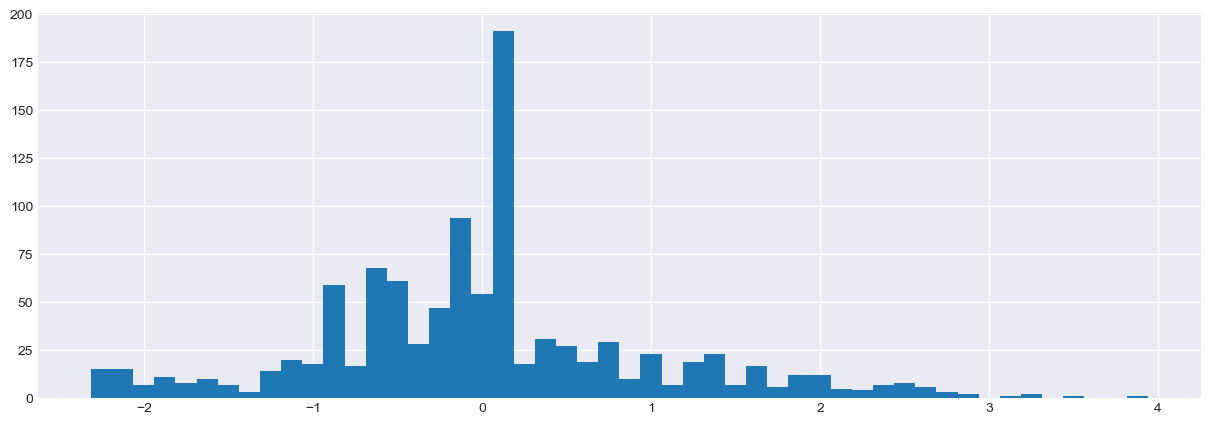

In [29]:
plt.hist(X_train[:,2], bins = 50)

In [30]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred =y_pred, y_true= y_test)

0.8015267175572519

In [31]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[139,  23],
       [ 29,  71]], dtype=int64)

In [32]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No', 'survived'])

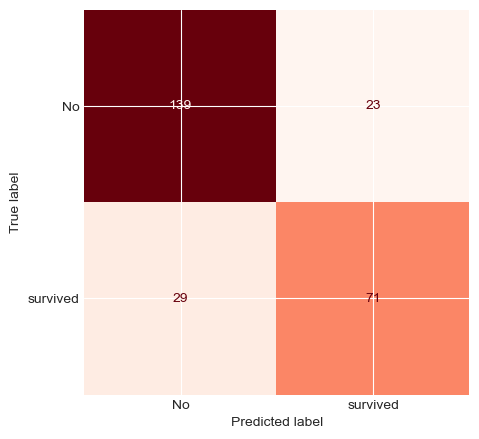

In [33]:
fig,ax = plt.subplots()
ax= disp.plot(cmap=plt.cm.Reds, ax=ax, colorbar=False)

<h4>SMOTE</h4>

In [35]:
X,y =make_classification(n_classes=2, class_sep=2,
                        weights=[0.1, 0.9],
                        n_informative=3,
                        n_redundant=1,
                        flip_y=0,
                        n_features=20,
                        n_clusters_per_class=1,
                        n_samples=N_SAMPLES,
                        random_state=RANDOM_STATE)

display(X.shape,y.shape)

(1000, 20)

(1000,)

In [36]:
Counter(y)

Counter({1: 900, 0: 100})

In [37]:
sm=SMOTE(random_state=RANDOM_STATE)

X_res, y_res = sm.fit_resample(X,y)

In [38]:
Counter(y_res)

Counter({1: 900, 0: 900})

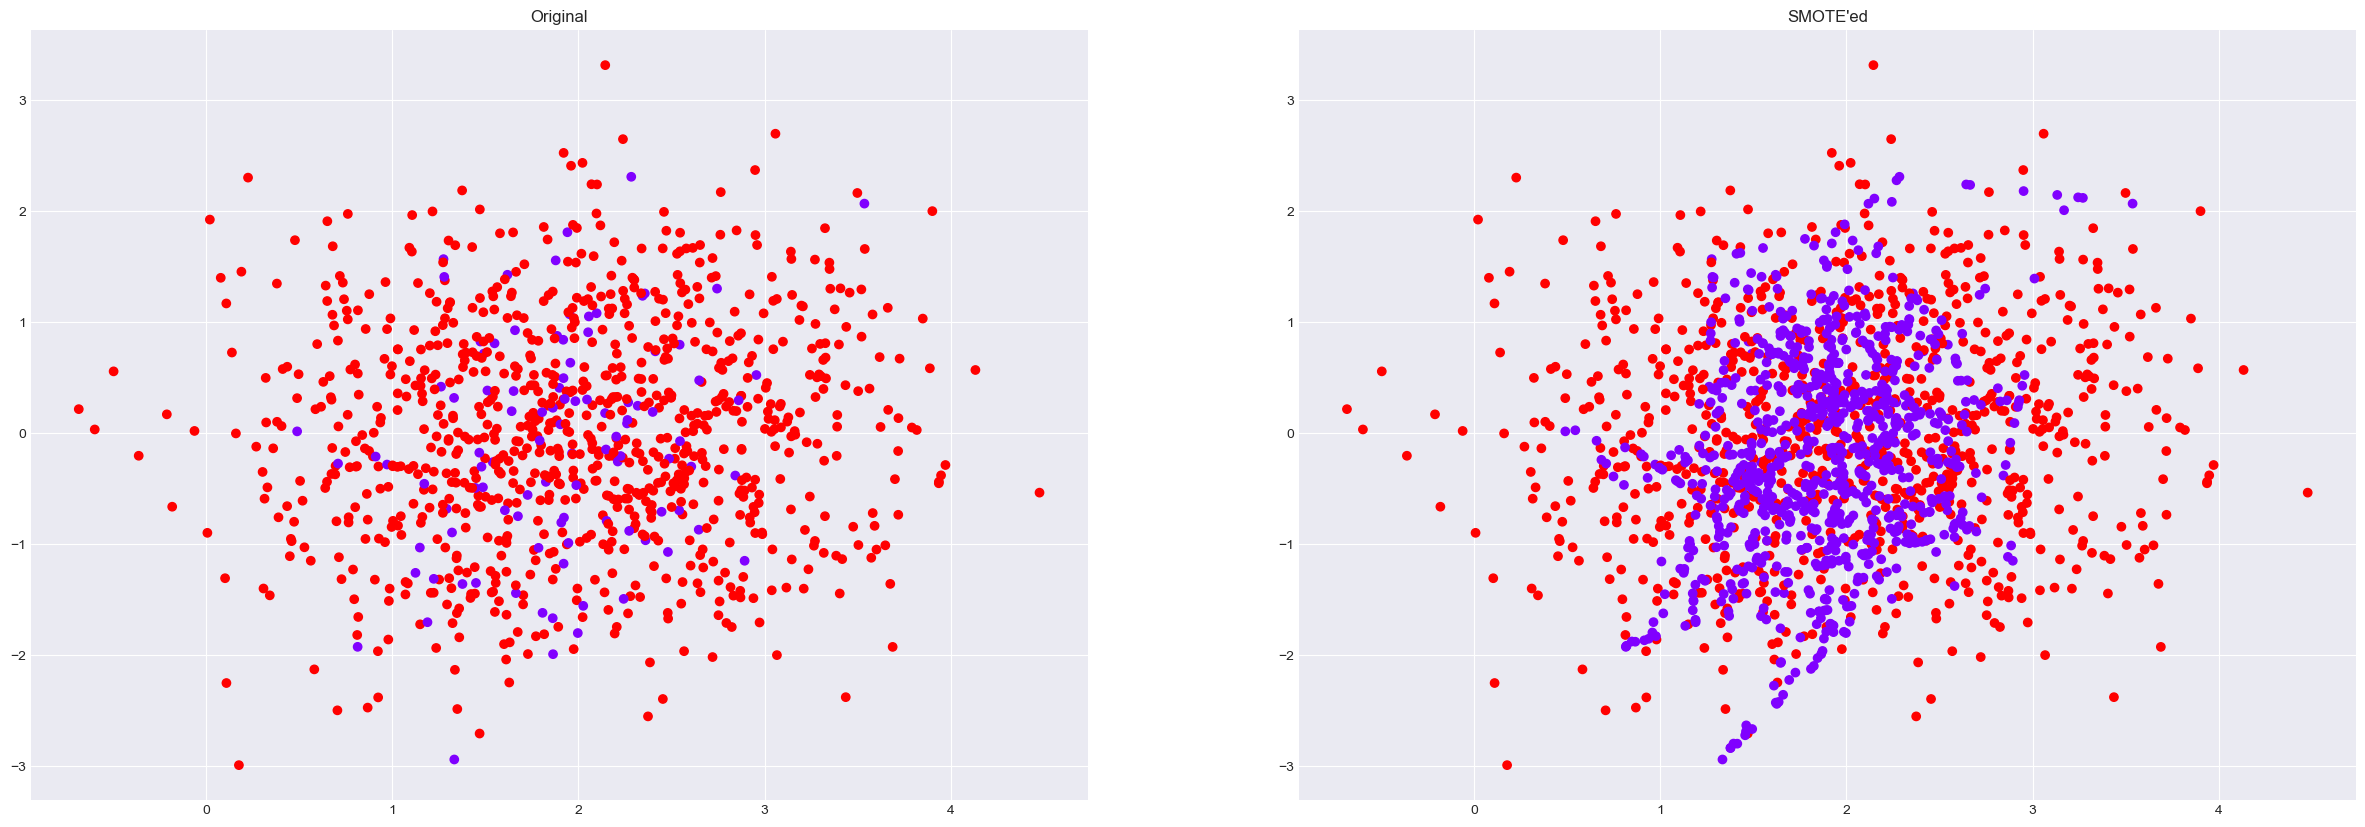

In [39]:
fig, axes = plt.subplots(1,2, figsize= (30,10))

axes[0].scatter(X[:,0], X[:,1], c=y, cmap=CMAP)
axes[0].set_title('Original')
axes[1].scatter(X_res[:,0], X_res[:,1], c=y_res, cmap=CMAP)
axes[1].set_title('SMOTE\'ed');

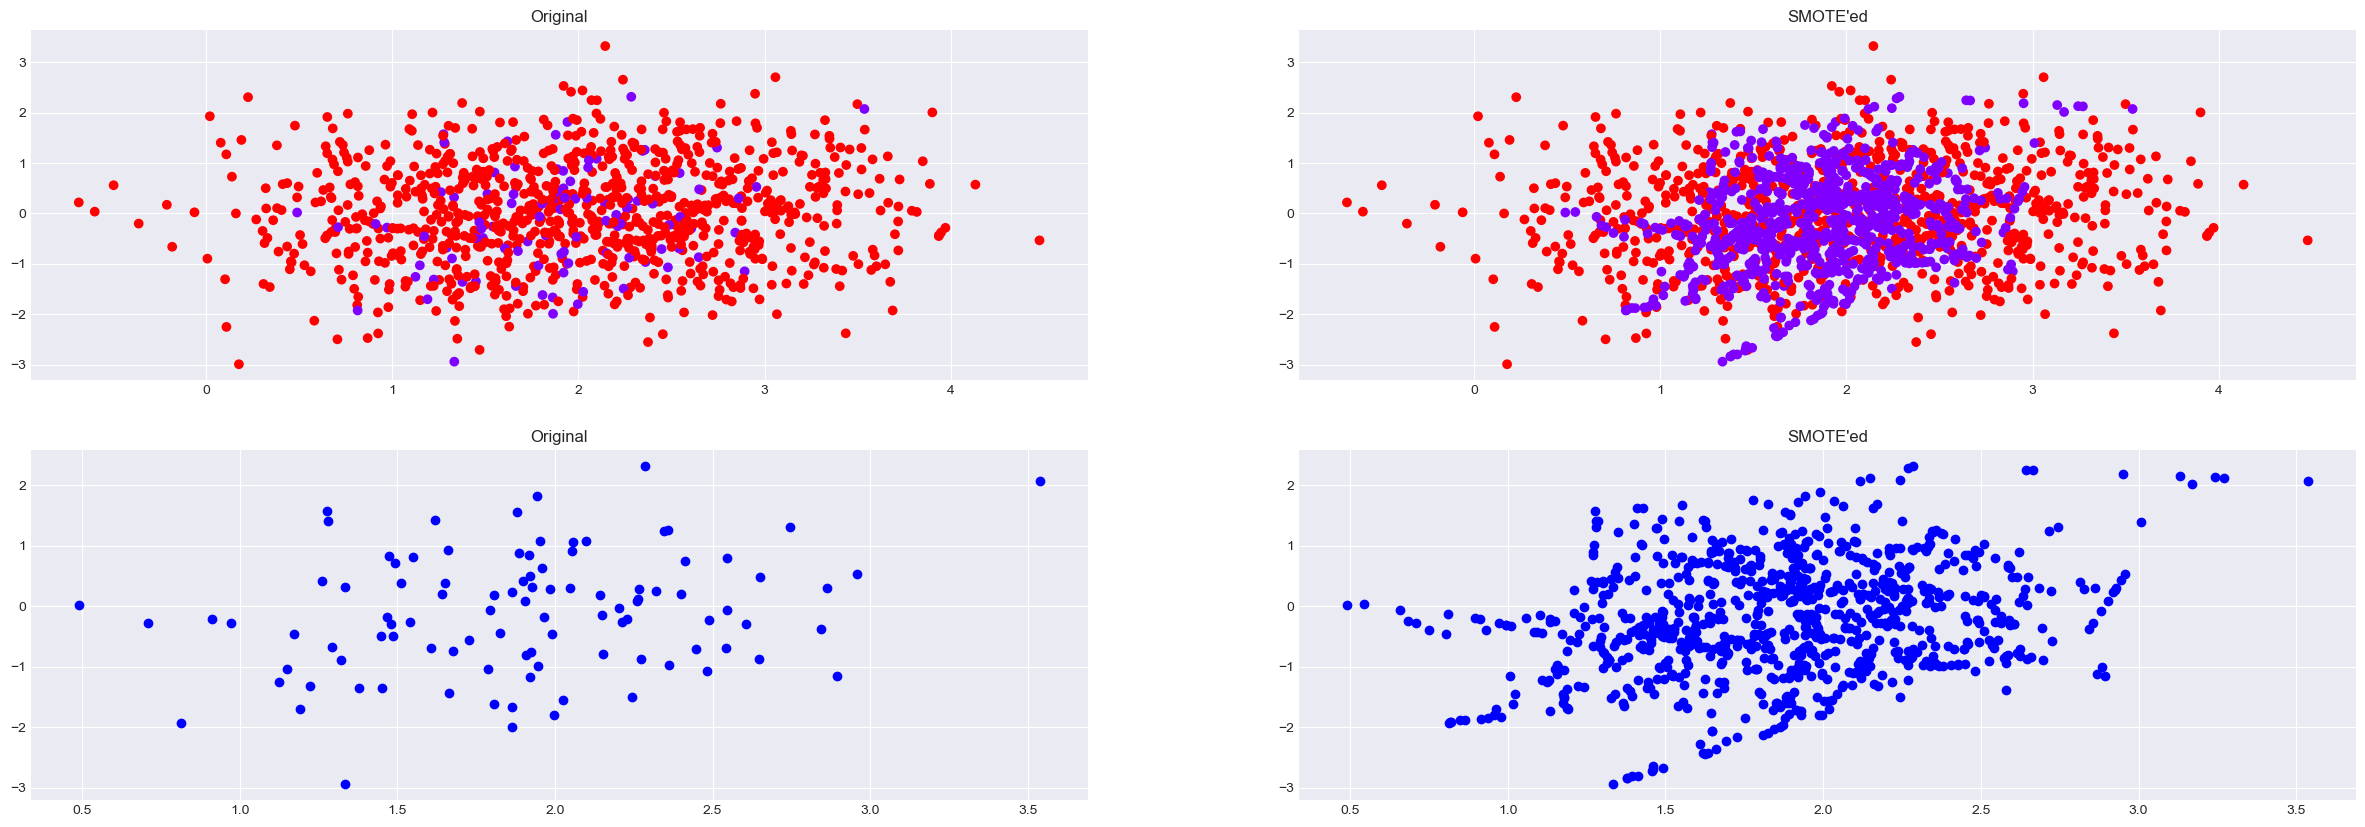

In [40]:
fig, axes = plt.subplots(2,2, figsize=(30,10))
axes = axes.flat
axes[0].scatter(X[:,0], X[:,1], c=y, cmap=CMAP)
axes[0].set_title('Original')
axes[1].scatter(X_res[:,0], X_res[:,1], c=y_res, cmap=CMAP)
axes[1].set_title('SMOTE\'ed');

axes[2].scatter(X[:,0][y==0], X[:,1][y==0], c='b')
axes[2].set_title('Original')
axes[3].scatter(X_res[:,0][y_res==0], X_res[:,1][y_res==0],c='b')
axes[3].set_title('SMOTE\'ed');

<h4>Load the Iris dataset RN</h4>

In [42]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
X = iris.data
y = iris.target

X = MinMaxScaler().fit_transform(X)

selector = SelectKBest(chi2, k=2)

selector.fit(X, y)

scores = -np.log10(selector.pvalues_)

scores /= scores.max()

X_new = selector.transform(X)

In [44]:
X.shape, X_new.shape

((150, 4), (150, 2))

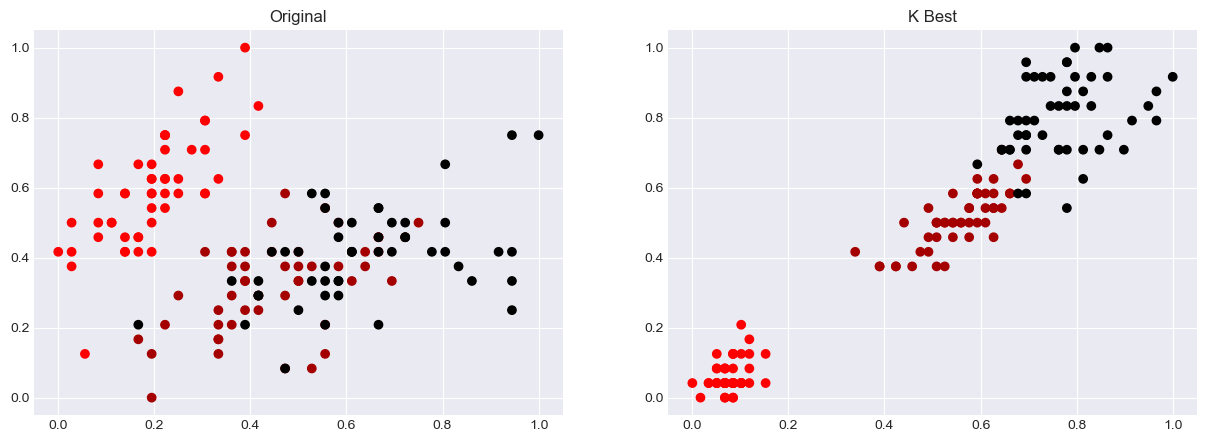

In [45]:
fig, axes = plt.subplots(1,2, figsize= (15,5))
axes = axes.flat
axes[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.flag)
axes[0].set_title('Original')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y, cmap=plt.cm.flag)
axes[1].set_title('K Best');

<h4>ANOVA</h4>

In [47]:
f_value, p_value = f_oneway(X[:,0], X[:,1], X[:,2], X[:,3])

print (f'ANOVA: {f_value} | P-value: {p_value}')

ANOVA: 0.6555306627548412 | P-value: 0.5797027550005627


In [48]:
sc = MinMaxScaler()

X_mm = sc.fit_transform(X)

f_value, p_value = f_oneway(X_mm[:,0], X_mm[:,1], X_mm[:,2], X_mm[:,3])

print (f'ANOVA: {f_value} | P-value: {p_value}')

ANOVA: 0.6555306627548412 | P-value: 0.5797027550005627


In [49]:
sc = StandardScaler()

X_sc = sc.fit_transform(X)

f_value, p_value = f_oneway(X_sc[:,0], X_sc[:,1], X_sc[:,2], X_sc[:,3])

print (f'ANOVA: {f_value} | P-value: {p_value}')

ANOVA: 1.0921668207916759e-29 | P-value: 1.0


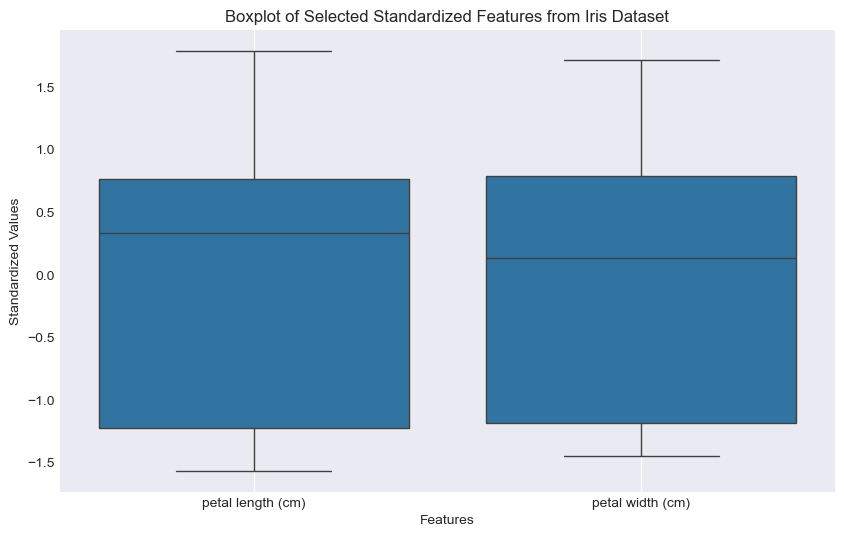

In [50]:
selected_feature_indices = selector.get_support(indices=True)
X_selected_df = pd.DataFrame(X_sc, columns=iris.feature_names).iloc[:, selected_feature_indices]

# Melting the DataFrame for easier plotting
X_melted = X_selected_df.melt(var_name='Feature', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=X_melted)
plt.title('Boxplot of Selected Standardized Features from Iris Dataset')
plt.ylabel('Standardized Values')
plt.xlabel('Features')
plt.grid()
plt.show()